In [52]:
pip install requests beautifulsoup4 requests-html

In [53]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession
from bs4 import BeautifulSoup
import requests

In [54]:
#webpage to be scrapped
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

In [ ]:
page =requests.get(url)
soup = BeautifulSoup(page.text,'html')
print (soup)

In [ ]:
soup.find('table')

In [58]:
table = soup.find_all('table')[1]

In [61]:
#find the titles
world_titles =table.find_all('th')

In [68]:
world_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [ ]:
world_table_titles = [title.text.strip() for title in world_titles]
print(world_table_titles)

In [64]:
import pandas as pd

In [67]:
# put headings into dataframe
df =pd.DataFrame(columns = world_table_titles)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [69]:
coulmn_data = table.find_all('tr')

In [70]:
for row in coulmn_data[1:]:
  row_data = row.find_all('td')
  individual_row_data= [data.text.strip() for data in row_data]
  print(individual_row_data)
  length = len(df)
  df.loc[length]=individual_row_data

['1', 'Walmart', 'Retail', '611,289', '6.7%', '2,100,000', 'Bentonville, Arkansas']
['2', 'Amazon', 'Retail and cloud computing', '513,983', '9.4%', '1,540,000', 'Seattle, Washington']
['3', 'ExxonMobil', 'Petroleum industry', '413,680', '44.8%', '62,000', 'Spring, Texas']
['4', 'Apple', 'Electronics industry', '394,328', '7.8%', '164,000', 'Cupertino, California']
['5', 'UnitedHealth Group', 'Healthcare', '324,162', '12.7%', '400,000', 'Minnetonka, Minnesota']
['6', 'CVS Health', 'Healthcare', '322,467', '10.4%', '259,500', 'Woonsocket, Rhode Island']
['7', 'Berkshire Hathaway', 'Conglomerate', '302,089', '9.4%', '383,000', 'Omaha, Nebraska']
['8', 'Alphabet', 'Technology and Cloud Computing', '282,836', '9.8%', '156,000', 'Mountain View, California']
['9', 'McKesson Corporation', 'Health', '276,711', '4.8%', '48,500', 'Irving, Texas']
['10', 'Chevron Corporation', 'Petroleum industry', '246,252', '51.6%', '43,846', 'San Ramon, California']
['11', 'AmerisourceBergen', 'Pharmaceutical 

In [71]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [75]:
# Extract numeric values from 'Revenue growth' column
df['Revenue growth'] = df['Revenue growth'].str.rstrip('%').astype('float') / 100.0

In [ ]:
#Replace commas and convert to float
for x in df.columns[3:]:
    df[x] = df[x].map(lambda x: float(x.replace(',','')))

In [ ]:
for x in df.columns[5:]:
    df[x] = df[x].map(lambda x: float(x.replace(',','')))

In [89]:
df.dtypes

Rank                       object
Name                       object
Industry                   object
Revenue (USD millions)    float64
Revenue growth            float64
Employees                 float64
Headquarters               object
dtype: object

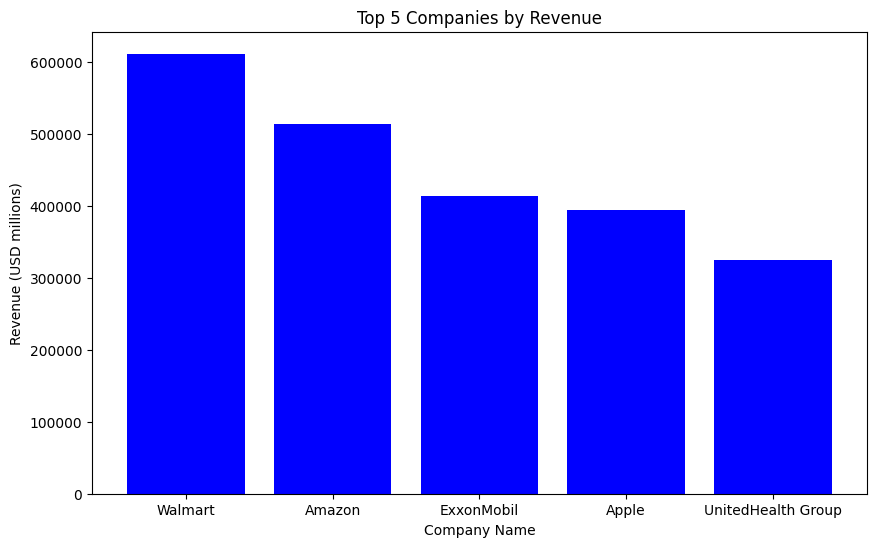

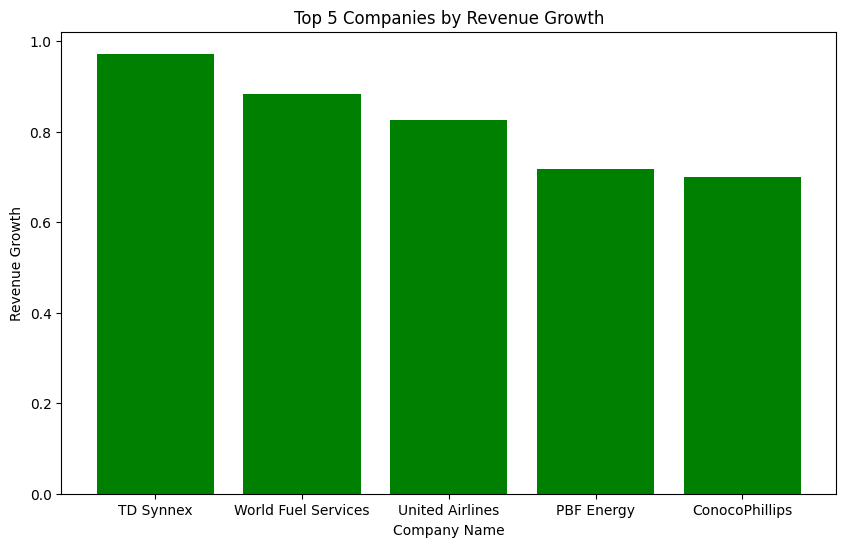

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort DataFrame by revenue and revenue growth
df_by_revenue = df.sort_values(by='Revenue (USD millions)', ascending=False).head(5)
df_by_growth = df.sort_values(by='Revenue growth', ascending=False).head(5)

# Plot bar chart for top five companies by revenue
plt.figure(figsize=(10, 6))
plt.bar(df_by_revenue['Name'], df_by_revenue['Revenue (USD millions)'], color='blue')
plt.title('Top 5 Companies by Revenue')
plt.xlabel('Company Name')
plt.ylabel('Revenue (USD millions)')
plt.show()

# Plot bar chart for top five companies by revenue growth
plt.figure(figsize=(10, 6))
plt.bar(df_by_growth['Name'], df_by_growth['Revenue growth'], color='green')
plt.title('Top 5 Companies by Revenue Growth')
plt.xlabel('Company Name')
plt.ylabel('Revenue Growth')
plt.show()

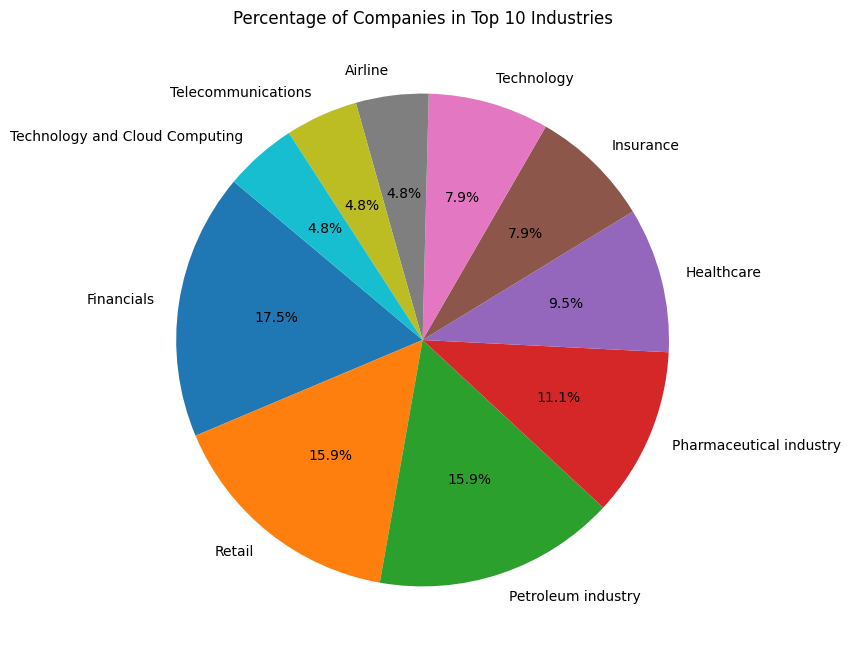

In [91]:

# Count the number of companies in each industry
industry_counts = df['Industry'].value_counts()

# Count the number of companies in each industry and select the top 10
top_industries = df['Industry'].value_counts().nlargest(10)

# Plot pie chart for the percentage of companies in the top 10 industries
plt.figure(figsize=(8, 8))
plt.pie(top_industries, labels=top_industries.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Companies in Top 10 Industries')
plt.show()

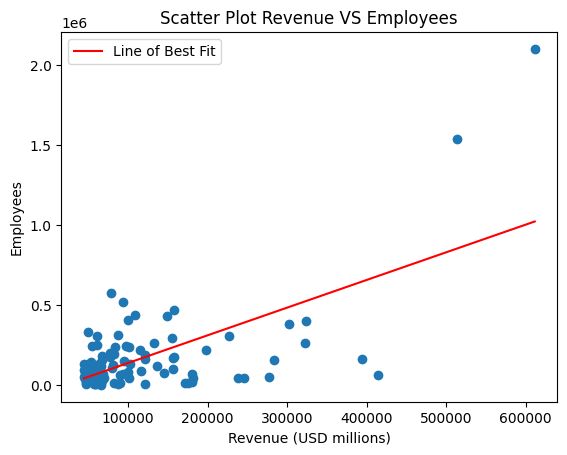

In [92]:

# Plotting the scatter plot
plt.scatter(df['Revenue (USD millions)'], df['Employees'])


x = df['Revenue (USD millions)']
y = df['Employees']
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)
plt.plot(x, line(x), color='red', label='Line of Best Fit')


# Customize the plot
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Employees')
plt.title('Scatter Plot Revenue VS Employees')
plt.legend()

# Show the plot
plt.show()



<ipython-input-93-461888f57e5e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


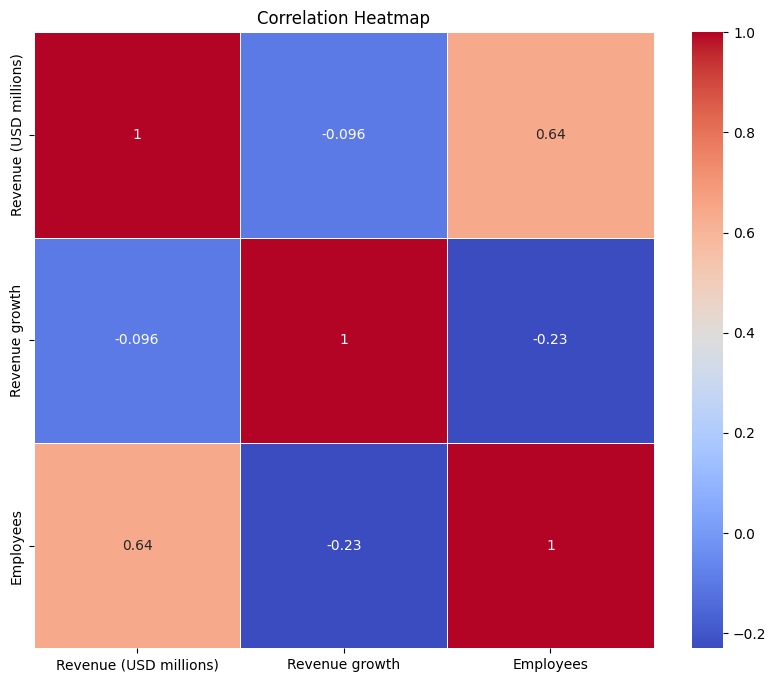

In [93]:
import seaborn as sns

# Sample code for Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()